# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

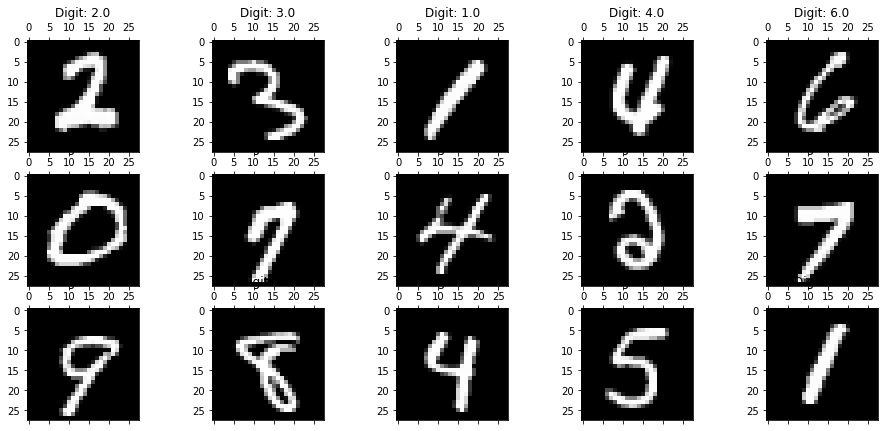

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???


주성분 개수 정하기
- Elbow Point: 곡선의 기울기가 급격하게 감소하는 지점
- Kaiser's Rule: 고유값 1 이상의 주성분들
- 누적설명률 70-80%

In [15]:
# MNIST 데이터의 feature 수가 너무 많기 때문에 연산량이 급증함과 함께 차원의 저주, 정보의 밀도 감소 등의 문제가 있다
# 차원 축소 기법들을 통해 feature의 수를 줄여 해당 문제들을 해결할 수 있다

## 차원 축소 적용 이전에 StandardScaler()를 활용한 scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_std)


PCA()

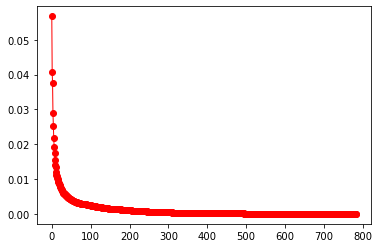

In [30]:
## 1번 Elbow Point 방법

eigvals = pca.explained_variance_ratio_
sing_vals = range(pca.n_components_)
plt.plot(sing_vals, eigvals, 'ro-', linewidth=1)

(0.0, 60.0)

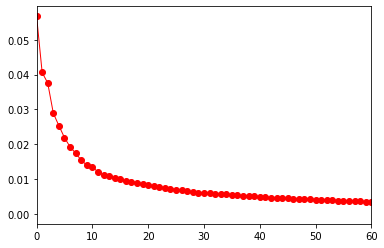

In [33]:
plt.plot(sing_vals, eigvals, 'ro-', linewidth=1) 
plt.xlim(0, 60) # 0-100 까지의 구간만 추가로 살펴보기
# elbow point은 10 부근으로 보여진다
# 성분 수에 비해 10개는 너무 적은 것으로 판단 되어 다른 방법도 적용해 보았다

In [35]:
# 2번 Kaiser's Rule

cov = np.cov(X_train_std.T)
eigvals, eigvecs = lin.eig(cov) # 고유값 eigenvalue 구하기
pca2 = len(eigvals[eigvals >=1]) # 고유값 1 이상의 성분들
pca2 # 총 163개의 주성분
# Elbow Point 방법에 비해 너무 많이 나와서 누적설명률 방법도 적용해 보았다

163

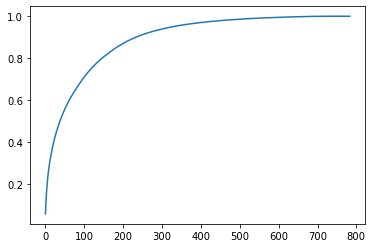

In [24]:
# 3번 누적설명률 방법
variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(variance)
# y축의 누적설명률이 0.8인 지점 알아보기가 힘듦

(0.0, 200.0)

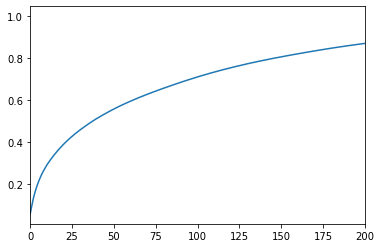

In [25]:
plt.plot(variance)
plt.xlim(0, 200) # 0-200 까지의 구간만 추가로 살펴보기

# 누적설명률이 80%인 지점은 125-150 사이인 것을 확인할 수 있다

In [36]:
pca3 = PCA(n_components = 0.7) #누적설명률이 0.7
pca3.fit(X_train_std)
pca3.n_components_ # 97 개의 주성분 

97

In [26]:
pca3 = PCA(n_components = 0.8) # 누적설명률이 0.8 
pca3.fit(X_train_std)
pca3.n_components_ # 147 개의 주성분

147

Elbow Point, Kaiser's Rule, 누적설명률이 70-80% 이상인 지점들 중 누적설명률이 70-80%와 Kaiser's Rule에 의한 주성분 개수가 서로 유사한 것을 확인하였다.<br>
    
누적설명률 70%, 누적설명률 80%, Kaiser's Rule 에 의한 주성분 수가 각각 97, 147, 163 으로 이 중에서 중앙값인 147개를 주성분 수로 활용하기로 결정하였다. 

In [54]:
# 주성분 147개로 PCA
pca = PCA(n_components = 147)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [45]:
## LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)

LinearDiscriminantAnalysis()

In [46]:
# 누적설명률로 주성분 개수 구하기

variance = np.cumsum(lda.explained_variance_ratio_)
d = np.argmax(variance >= 0.8) #누적설명률 0.8
d # LDA 주성분 수 4개

4

In [47]:
# 2주성분 4개로 LDA
lda = LinearDiscriminantAnalysis(n_components = 4)
lda.fit(X_train_std, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [50]:
import time

In [58]:
## Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

# RandomForest Original
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
end = time.time()
print("training time:",end-start)

training time: 43.838032722473145


In [59]:
rf.score(X_test_std, y_test)

0.9677857142857142

In [52]:
# RandomForestPCA
start = time.time()
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)
end = time.time()
print("training time:",end-start)

training time: 90.23478388786316


In [55]:
rf_pca.score(X_test_pca, y_test)

0.9395714285714286

In [56]:
# RandomForestLDA
start = time.time()
rf_lda = RandomForestClassifier()
rf_lda.fit(X_train_lda, y_train)
end = time.time()
print("training time:", end-start)

training time: 15.826994895935059


In [57]:
rf_lda.score(X_test_lda, y_test)

0.8248571428571428

training 시간은 LDA < original < PCA 순으로 나온 것을 확인하였고 정확도의 향상을 위해 차원축소를 진행하였지만 오히려 original 데이터의 정확도가 가장 높게 나온 것을 확인할 수 있었다. 


In [61]:
## SVM
from sklearn.svm import SVC

# SVM Original
start = time.time()
svm = SVC()
svm.fit(X_train_std, y_train)
end = time.time()
print("training time:",end-start)

training time: 639.7256286144257


In [63]:
from sklearn.metrics import *
pred_original = svm.predict(X_test_std)
accuracy_score(y_test, pred_original)

0.9655714285714285

In [68]:
# SVM PCA
start = time.time()
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
end = time.time()
print("training time:",end-start)

training time: 138.7186164855957


In [69]:
pred_pca = svm_pca.predict(X_test_pca)
accuracy_score(y_test, pred_pca)

0.9703571428571428

In [70]:
# SVM LDA
start = time.time()
svm_lda = SVC()
svm_lda.fit(X_train_lda, y_train)
end = time.time()
print("training time:",end-start)

training time: 18.544055938720703


In [71]:
pred_lda = svm_lda.predict(X_test_lda)
accuracy_score(y_test, pred_lda)

0.8324285714285714

Original 데이터의 경우 학습 시간이 약 10분 으로 굉장히 오래 걸린 것을 확인할 수 있다. 이후 차원축소를 진행한 결과, training 시간이 현저히 줄어들었지만 Random Forest 보다는 오래걸렸다. 
    
PCA 한 데이터를 SVM 한 결과의 정확도가 97%로 가장 높게 나왔기 때문에 Grid Search를 통해 해당 모델의 정확도를 향상시켜보기로 결정했다. 

In [ ]:
## SVM Grid SEarch with PCA data

param_grid = {'C':[0.01,0.1,1,10,100, 1000]
                'gamma': [0.0001, 0.001]}
grid_svm = GridSearchCV(svm_pca, 
                    param_grid, 
                    cv=3, 
                    scoring='accuracy',
                    n_jobs = -1)
grid_svm.fit(X_train_pca,y_train)

In [ ]:
print("Best Parameter: {}".format(grid_svm.best_params_))
print("Test set Score: {:.4f}".format(grid_svm.score(X_test_pca, y_test)))

## 가장 높은 test accuracy가 나오신 분께 이모티콘을 증정해드리겠습니다!!